In [ ]:
# Read the data in and split into train and test sets

import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

data = pd.read_csv('trainingDatav2.3.csv')


data.head()
data.dropna(axis=0, inplace=True)
X = data.loc[:, ~data.columns.isin(['NORMALISED_LAP_TIME_MS', 'CURRENT_LAP_TIME_MS'])]
y = data['NORMALISED_LAP_TIME_MS']


# # Split data into 80-20 train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
data_train = pd.concat([y_train, X_train], axis=1, join='inner')
data_test = pd.concat([y_test, X_test], axis=1, join='inner')



## Analyse Data For Correlations

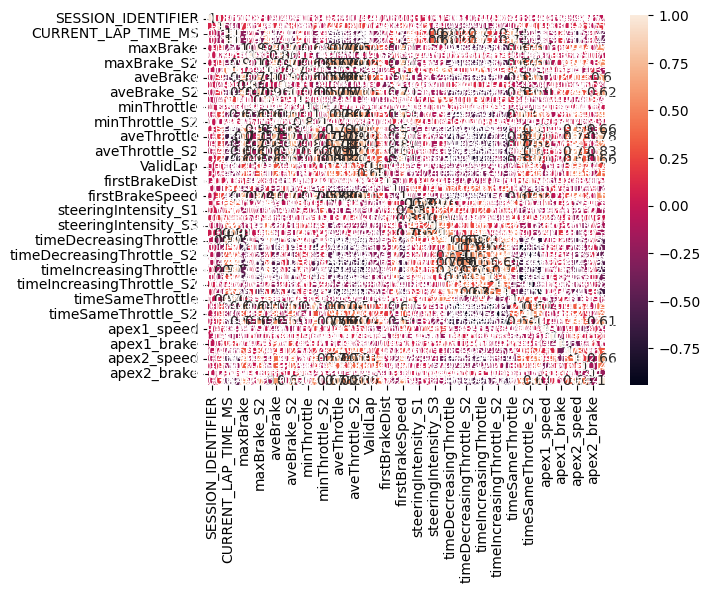

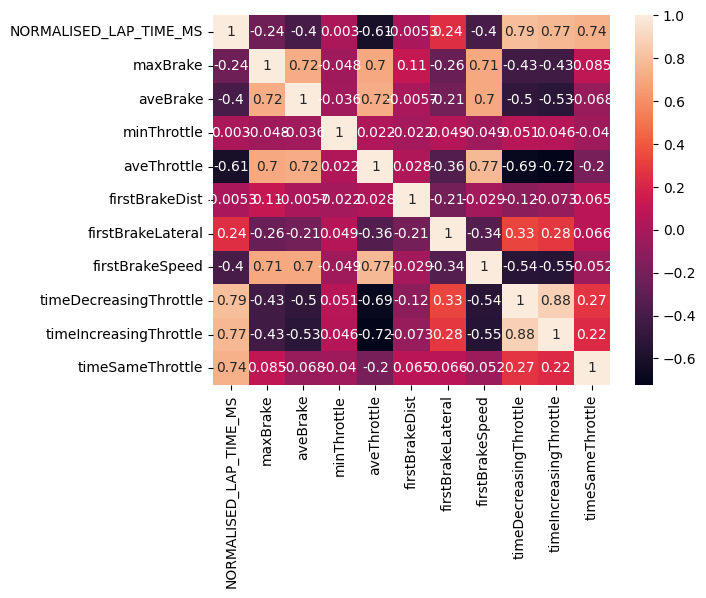

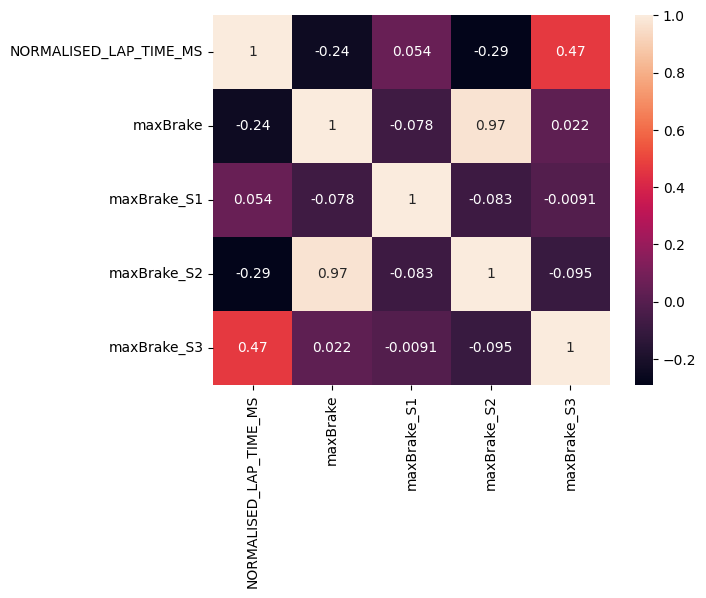

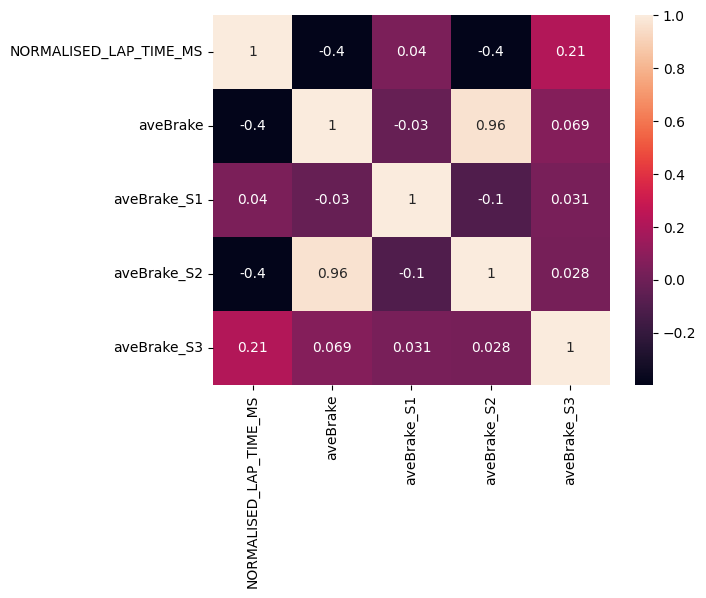

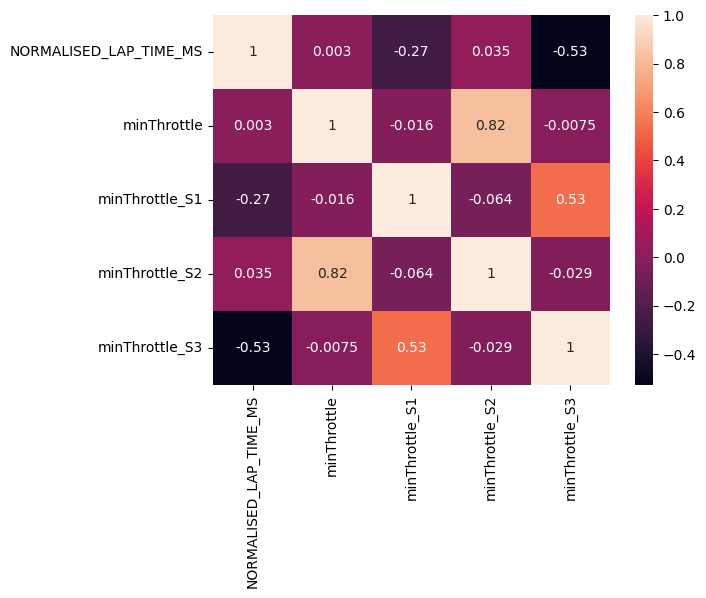

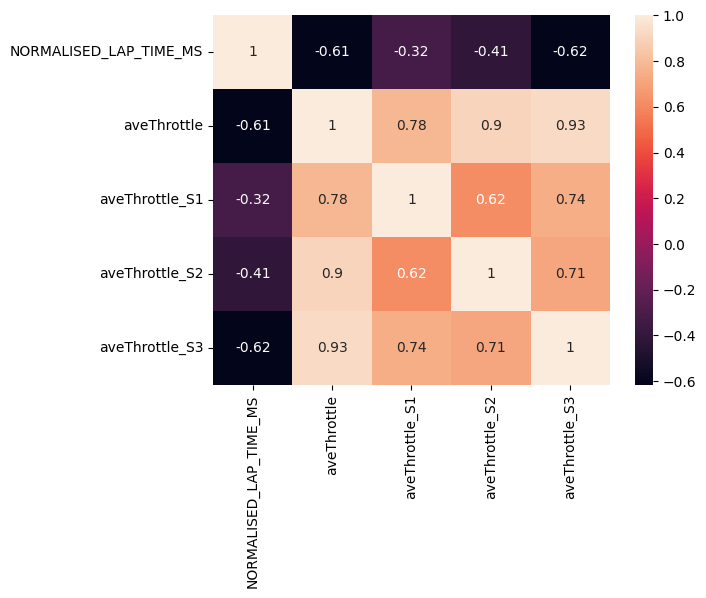

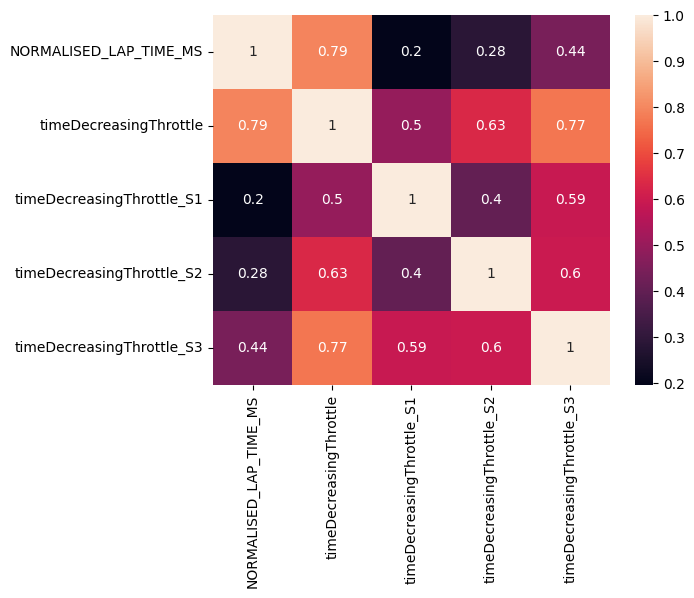

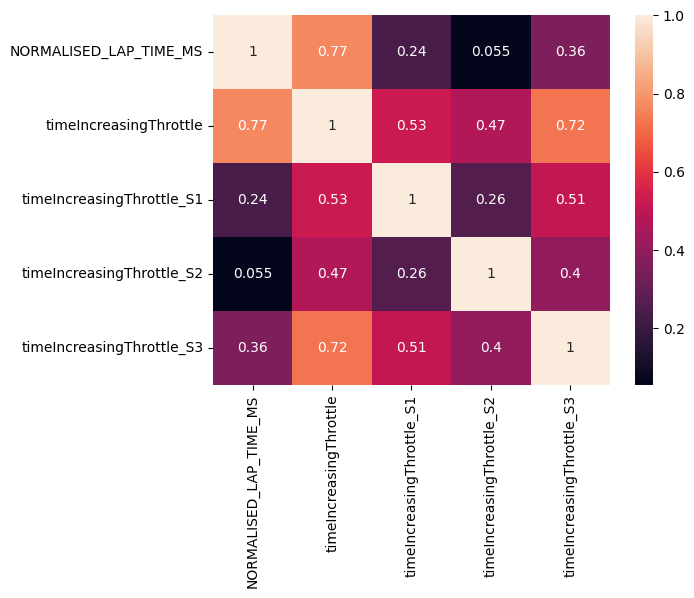

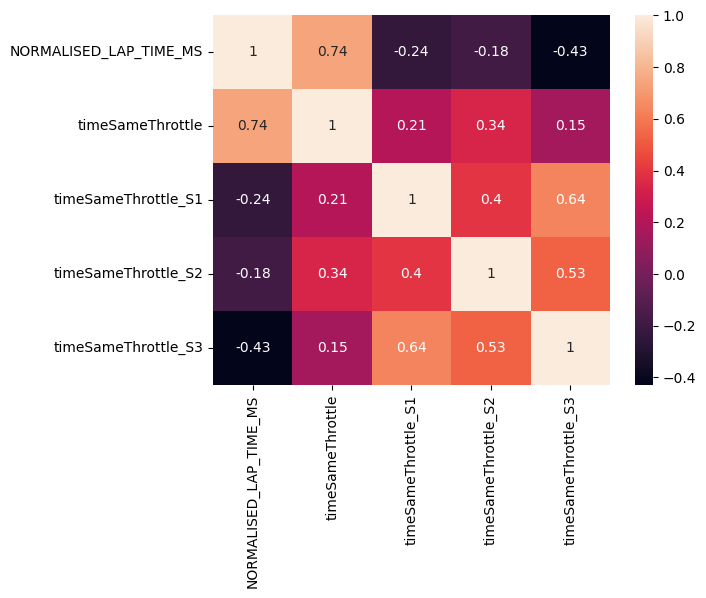

In [ ]:
# Finding the correlation matrices


correlation_matrix = data.corr().round(4)

sns.heatmap(correlation_matrix, annot=True)
plt.show()


correlation_matrix_overall = data[['NORMALISED_LAP_TIME_MS', 'maxBrake', 'aveBrake', 'minThrottle', 'aveThrottle', 'firstBrakeDist', 'firstBrakeLateral', 'firstBrakeSpeed', 'timeDecreasingThrottle', 'timeIncreasingThrottle', 'timeSameThrottle']].corr().round(4)
correlation_matrix_maxBrake = data[['NORMALISED_LAP_TIME_MS', 'maxBrake', 'maxBrake_S1', 'maxBrake_S2', 'maxBrake_S3']].corr().round(4)
correlation_matrix_aveBrake = data[['NORMALISED_LAP_TIME_MS', 'aveBrake', 'aveBrake_S1', 'aveBrake_S2', 'aveBrake_S3']].corr().round(4)
correlation_matrix_minThrottle = data[['NORMALISED_LAP_TIME_MS', 'minThrottle', 'minThrottle_S1', 'minThrottle_S2', 'minThrottle_S3']].corr().round(4)
correlation_matrix_aveThrottle = data[['NORMALISED_LAP_TIME_MS', 'aveThrottle', 'aveThrottle_S1', 'aveThrottle_S2', 'aveThrottle_S3']].corr().round(4)
correlation_matrix_timeDecreasingThrottle = data[['NORMALISED_LAP_TIME_MS', 'timeDecreasingThrottle', 'timeDecreasingThrottle_S1', 'timeDecreasingThrottle_S2', 'timeDecreasingThrottle_S3']].corr().round(4)
correlation_matrix_timeIncreasingThrottle = data[['NORMALISED_LAP_TIME_MS', 'timeIncreasingThrottle', 'timeIncreasingThrottle_S1', 'timeIncreasingThrottle_S2', 'timeIncreasingThrottle_S3']].corr().round(4)
correlation_matrix_timeSameThrottle = data[['NORMALISED_LAP_TIME_MS', 'timeSameThrottle', 'timeSameThrottle_S1', 'timeSameThrottle_S2', 'timeSameThrottle_S3']].corr().round(4)



sns.heatmap(correlation_matrix_overall, annot=True)
plt.show()

sns.heatmap(correlation_matrix_maxBrake, annot=True)
plt.show()

sns.heatmap(correlation_matrix_aveBrake, annot=True)
plt.show()

sns.heatmap(correlation_matrix_minThrottle, annot=True)
plt.show()

sns.heatmap(correlation_matrix_aveThrottle, annot=True)
plt.show()

sns.heatmap(correlation_matrix_timeDecreasingThrottle, annot=True)
plt.show()


sns.heatmap(correlation_matrix_timeIncreasingThrottle, annot=True)
plt.show()

sns.heatmap(correlation_matrix_timeSameThrottle, annot=True)
plt.show()


In [ ]:
# Based on high multicollinearity shown above, remove non-sector specific versions of variables:

X = data.loc[:, ~data.columns.isin(['NORMALISED_LAP_TIME_MS', 'SESSION_IDENTIFIER', 'LAP_NUM', 'CURRENT_LAP_TIME_MS', 'maxBrake', 'aveBrake', 'minThrottle', 'aveThrottle', 'timeDecreasingThrottle', 'timeIncreasingThrottle', 'timeSameThrottle'])]
y = data['NORMALISED_LAP_TIME_MS']


# Split data into 80-20 train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
data_train = pd.concat([y_train, X_train], axis=1, join='inner')
data_test = pd.concat([y_test, X_test], axis=1, join='inner')
X.head()

,maxBrake_S1,maxBrake_S2,maxBrake_S3,aveBrake_S1,aveBrake_S2,aveBrake_S3,minThrottle_S1,minThrottle_S2,minThrottle_S3,aveThrottle_S1,...,timeSameThrottle_S2,timeSameThrottle_S3,apex1_speed,apex1_lateral,apex1_brake,apex1_throttle,apex2_speed,apex2_lateral,apex2_brake,apex2_throttle
0,0.0,0.724300,0.0,0.0,0.185403,0.0,1.0,0.0,1.0,1.0,...,0.814003,1.0,172,0.930623,0.000000,0.573830,214,0.191894,0.0,1.00000
1,0.0,0.839170,0.0,0.0,0.187734,0.0,1.0,0.0,1.0,1.0,...,0.809708,1.0,171,0.871912,0.000000,0.460073,209,0.107657,0.0,1.00000
2,0.0,0.960037,0.0,0.0,0.221157,0.0,1.0,0.0,1.0,1.0,...,0.607207,1.0,166,0.963786,0.000000,0.377523,206,0.120444,0.0,1.00000
3,0.0,0.934056,0.0,0.0,0.199352,0.0,1.0,0.0,1.0,1.0,...,0.839251,1.0,167,0.909077,0.000000,0.368063,203,0.123842,0.0,1.00000
4,0.0,0.872526,0.0,0.0,0.208517,0.0,1.0,0.0,1.0,1.0,...,0.672890,1.0,184,1.900798,0.179667,0.333333,201,-0.061035,0.0,0.54841


## Variable Selection

### Univariate Feature Selection

In [ ]:
# correlation feature selection for numerical data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)

# what are scores for the features
predictors = list(X_train.columns)
for i in range(len(fs.scores_)):
	print('%s: %f' % (predictors[i], fs.scores_[i]))

maxBrake_S1: 0.871565
maxBrake_S2: 61.660193
maxBrake_S3: 183.122511
aveBrake_S1: 0.335706
aveBrake_S2: 145.130537
aveBrake_S3: 26.676864
minThrottle_S1: 54.662241
minThrottle_S2: 0.055265
minThrottle_S3: 260.186208
aveThrottle_S1: 81.040623
aveThrottle_S2: 152.748264
aveThrottle_S3: 431.697250
ValidLap: 30.856430
ValidLap_4wheels: 70.074953
firstBrakeDist: 0.706452
firstBrakeLateral: 40.561453
firstBrakeSpeed: 136.360357
steeringIntensity: 96.219385
steeringIntensity_S1: 28.798046
steeringIntensity_S2: 19.535606
steeringIntensity_S3: 97.404916
steering2: 564.140536
timeDecreasingThrottle_S1: 30.481229
timeDecreasingThrottle_S2: 65.942039
timeDecreasingThrottle_S3: 157.280518
timeIncreasingThrottle_S1: 47.740606
timeIncreasingThrottle_S2: 1.928787
timeIncreasingThrottle_S3: 108.921581
timeSameThrottle_S1: 45.824349
timeSameThrottle_S2: 24.264169
timeSameThrottle_S3: 156.210470
apex1_speed: 13.193834
apex1_lateral: 20.391554
apex1_brake: 19.570957
apex1_throttle: 25.237302
apex2_speed: 

### Sequential Feature Selection: Forward/Backward Stepwise Selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV

X_train.dropna(axis=0, inplace=True)

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_train, y_train)
feature_names = np.array(X_train.columns)

for i in range(1,len(X_train.columns) - 1):

    sfs_forward = SequentialFeatureSelector(ridge, n_features_to_select=i, direction="forward").fit(X_train, y_train)

    sfs_backward = SequentialFeatureSelector(ridge, n_features_to_select=i, direction="backward").fit(X_train, y_train)
    
    print(f"For {i} variables:")
    print(
        "Features selected by forward sequential selection: "
        f"{feature_names[sfs_forward.get_support()]}"
    )
    print(
        "Features selected by backward sequential selection: "
        f"{feature_names[sfs_backward.get_support()]}"
    )

For 1 variables:
Features selected by forward sequential selection: ['steering2']
Features selected by backward sequential selection: ['steering2']
For 2 variables:
Features selected by forward sequential selection: ['aveThrottle_S3' 'steering2']
Features selected by backward sequential selection: ['aveThrottle_S3' 'steering2']
For 3 variables:
Features selected by forward sequential selection: ['aveThrottle_S3' 'steeringIntensity_S2' 'steering2']
Features selected by backward sequential selection: ['aveThrottle_S3' 'steeringIntensity_S2' 'steering2']
For 4 variables:
Features selected by forward sequential selection: ['aveThrottle_S3' 'steeringIntensity_S2' 'steering2' 'apex2_speed']
Features selected by backward sequential selection: ['aveThrottle_S3' 'steeringIntensity_S2' 'steering2' 'apex2_speed']
For 5 variables:
Features selected by forward sequential selection: ['aveThrottle_S3' 'steeringIntensity_S2' 'steering2' 'apex1_speed'
 'apex2_speed']
Features selected by backward seque

KeyboardInterrupt: 

### Feature Selection with Lasso Regularisation

In [ ]:
import pandas as pd
from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform Lasso regression with cross-validation
lasso_cv = LassoCV(cv=10)
lasso_cv.fit(X_train_scaled, y_train)
alpha = lasso_cv.alpha_

# Train 10 predictors with parameter ˆα
lasso_models = []
for i in range(10):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    lasso_models.append(lasso)

# Train new Lasso predictor with α = ˆα on all the training data
lasso_final = Lasso(alpha=alpha)
lasso_final.fit(X_train_scaled, y_train)
y_pred_final = lasso_final.predict(X_test_scaled)
final_mse = mean_squared_error(y_test, y_pred_final)
print("MSE: ", final_mse)


# Count the number of non-zero coefficients in each Lasso predictor
lasso_avg_sparsity = np.mean([np.sum(lasso.coef_ != 0) for lasso in lasso_models])
lasso_final_sparsity = np.sum(lasso_final.coef_ != 0)
coeffs = lasso.coef_  

# Print predictors selected
predictors_selected_lasso = []
for i in range(len(predictors)):
    if coeffs[i] != 0:
        print(f"{predictors[i]}: {coeffs[i]}") 
        predictors_selected_lasso.append(predictors[i])

print(predictors_selected_lasso)

print(f"Sparsity: {lasso_final_sparsity}")

In [ ]:
# Check for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor    

X_train = X_train.assign(const=1)
variables = list(range(X_train.shape[1]))

to_be_dropped = []

dropped = True
while dropped:
    dropped = False
    vif = [variance_inflation_factor(X_train.iloc[:, variables].values, ix)
            for ix in range(X_train.iloc[:, variables].shape[1])]
    vif = vif[:-1]
    maxloc = vif.index(max(vif))
    if max(vif) > 5.0:
        print('Variable to be dropped: \'' + X_train.iloc[:, variables].columns[maxloc] +
                '\'')
        to_be_dropped.append(X_train.iloc[:, variables].columns[maxloc])
        del variables[maxloc]
        
        dropped = True
print(to_be_dropped)
X_train.drop(columns=['const'], inplace=True)

predictors_kept_VIF = [x for x in X_train.columns if x not in to_be_dropped]

## Multiple Linear Regression

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# implement OLS

# # Define which variables we are going to use
# formula = 'NORMALISED_LAP_TIME_MS ~ '
# for pred in predictors[:-1]:
#     formula += pred + ' + '

# formula += predictors[-1]
# print(formula)

# Multiple linear regression with NORMALISED_LAP_TIME_MS vs every other covariate
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 13902484.783523442


In [ ]:
from sklearn.linear_model import ElasticNet
# Train an Elastic Net model
alpha = 0.5  # Controls the strength of the regularization
l1_ratio = 0.5  # Mixing parameter between L1 and L2 regularization
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
elastic_net.fit(X_train, y_train)

# Make predictions on the test set
y_pred = elastic_net.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 35503571.29116881


## Random Forest

In [ ]:
# Read the data in and split into train and test sets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')



# Random forest model 
def random_forest(start, finish, increment):

    # Hold MSE values 
    mse_vals = []
    # Hold number of trees values 
    num_of_trees = []

    # Loop via number of decision trees to locate the model with the lowest MSE
    for i in range(start, finish+1, increment):

        random_forest_mod = RandomForestRegressor(n_estimators=i, random_state=42)

        # Fit the model with training data 
        random_forest_mod.fit(X_train, y_train)

        # Run predictions 
        random_forest_pred = random_forest_mod.predict(X_test)

        # Evaluate model 
        mse = mean_squared_error(y_test, random_forest_pred)

        # Append to mse_vals 
        mse_vals.append(mse)
        
        # Append to num_of_trees
        num_of_trees.append(i)  
    
    # Dictionary to store value for the number of trees and their respective MSE values 
    eval_random_forest = dict(zip(num_of_trees, mse_vals))

    # Locate the number of trees with the lowest MSE 
    for key, val in eval_random_forest.items():
        if val == min(mse_vals):
            return key 

# Call the random_forest function
# start -> number of trees to start with 
# finish -> number of trees to end with 
# increment -> increment number by
optimal_num_of_trees = random_forest(start = 100, finish = 500, increment = 50)

# Run the model with the optimal number of trees
random_forest_mod = RandomForestRegressor(n_estimators=optimal_num_of_trees, random_state=42)
random_forest_mod.fit(X_train, y_train)
random_forest_pred = random_forest_mod.predict(X_test)

random_forest_mse = mean_squared_error(y_test, random_forest_pred)
print(random_forest_mse)
print(np.sqrt(random_forest_mse))
print(optimal_num_of_trees)


11704113.68744009
3421.1275462104727
100


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d1a667d0-3328-49c8-aca0-3e3471e404c5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>